# Week 0 Challenge

In [1]:
import zipfile
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import zscore

sys.path.append('..')
from utils import *

In [12]:
#colab
zip_path = "/content/drive/MyDrive/Technical Content/data.zip"

In [13]:
#colab
extract_path = "/content/"  # This is the Colab runtime folder

In [14]:
#colab
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Technical Content/data.zip'

In [2]:
file_benin = "/home/helina/Documents/week0/data/benin-malanville.csv"
file_sierra_leone = "/home/helina/Documents/week0/data/sierraleone-bumbuna.csv"
file_togo = "/home/helina/Documents/week0/data/togo-dapaong_qc.csv"

# Load each dataset
benin_data = pd.read_csv(file_benin)
sierra_leone_data = pd.read_csv(file_sierra_leone)
togo_data = pd.read_csv(file_togo)

# Display the first few rows for verification
print("benin")
print(benin_data.head())
print("sierra")
print(sierra_leone_data.head())
print("togo")
print(togo_data.head())


benin
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
sierra
       

In [ ]:
benin_data['Region'] = 'Benin'
sierra_leone_data['Region'] = 'Sierra Leone'
togo_data['Region'] = 'Togo'

In [ ]:
benin_data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments Region  
0       NaN  Benin  
1       NaN  Benin  
2       NaN  Benin  
3       NaN  Benin  
4       NaN  Benin

In [ ]:
len(benin_data)

525600

In [ ]:
print("Benin Null Values:\n", benin_data.isnull().sum())
print("\nSierra Leone Null Values:\n", sierra_leone_data.isnull().sum())
print("\nTogo Null Values:\n", togo_data.isnull().sum())

Benin Null Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
Region                0
dtype: int64

Sierra Leone Null Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
Reg

In [ ]:
# Remove columns with all null values
benin_data = benin_data.dropna(axis=1, how='all')
sierra_leone_data = sierra_leone_data.dropna(axis=1, how='all')
togo_data = togo_data.dropna(axis=1, how='all')

# Verify that null columns have been removed
print("\nBenin Null Values (after removal):\n", benin_data.isnull().sum())
print("\nSierra Leone Null Values (after removal):\n", sierra_leone_data.isnull().sum())
print("\nTogo Null Values (after removal):\n", togo_data.isnull().sum())


Benin Null Values (after removal):
 Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Region           0
dtype: int64

Sierra Leone Null Values (after removal):
 Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Region           0
dtype: int64

Togo Null Values (after removal):
 Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH

In [ ]:
benin_data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments Region  
0       NaN  Benin  
1       NaN  Benin  
2       NaN  Benin  
3       NaN  Benin  
4       NaN  Benin

### Histograms

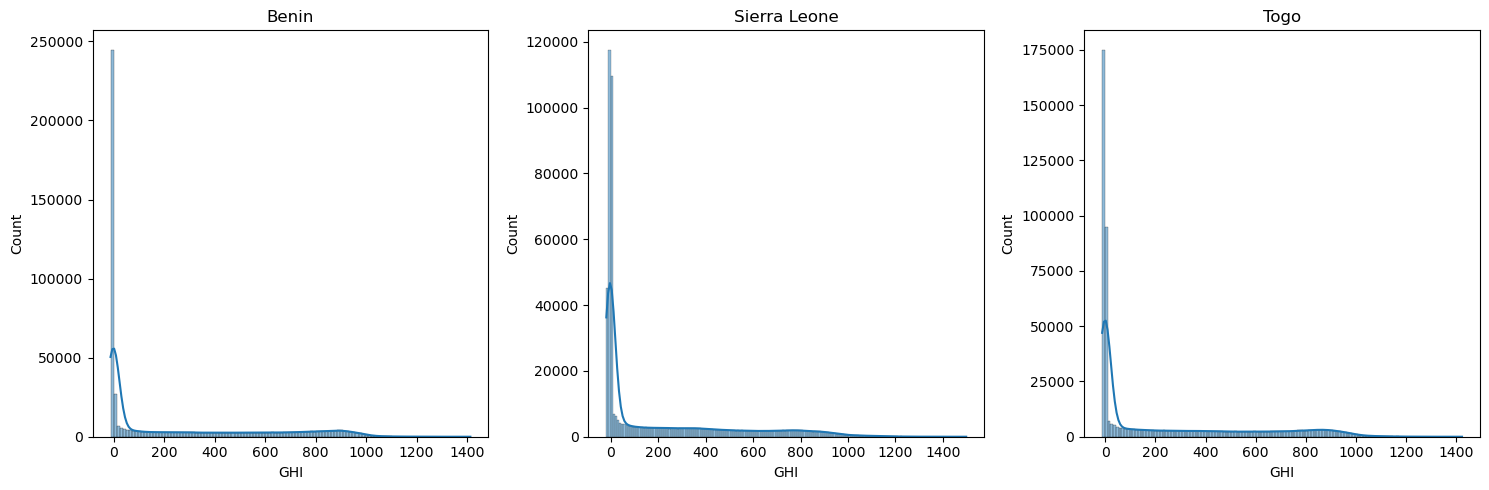

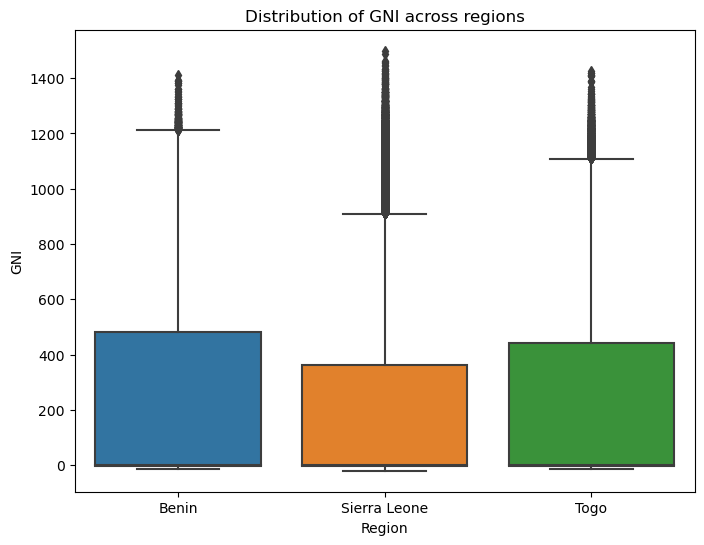

In [ ]:
# Create subplots for each region
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Benin
plot_histogram(benin_data, 'GHI', axes[0], 'Benin', 'GHI')

# Sierra Leone
plot_histogram(sierra_leone_data, 'GHI', axes[1], 'Sierra Leone', 'GHI')

# Togo
plot_histogram(togo_data, 'GHI', axes[2], 'Togo', 'GHI')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(x='Region', y='GHI', data=pd.concat([benin_data, sierra_leone_data, togo_data]))
axes.set_title('Distribution of GNI across regions')
axes.set_ylabel('GNI')
plt.show()

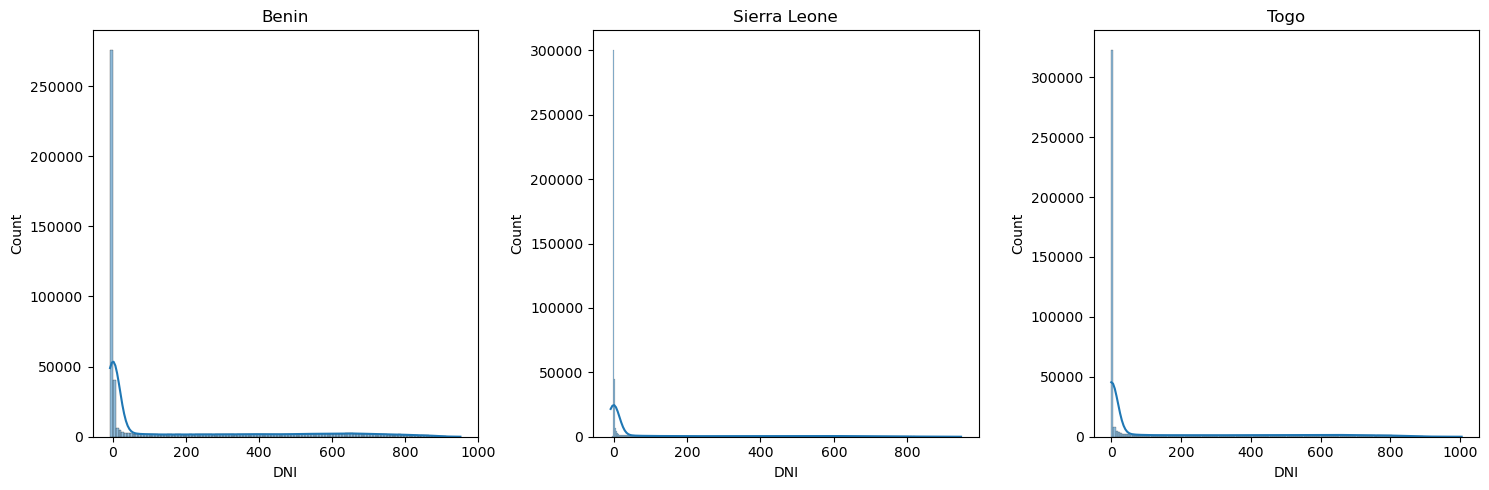

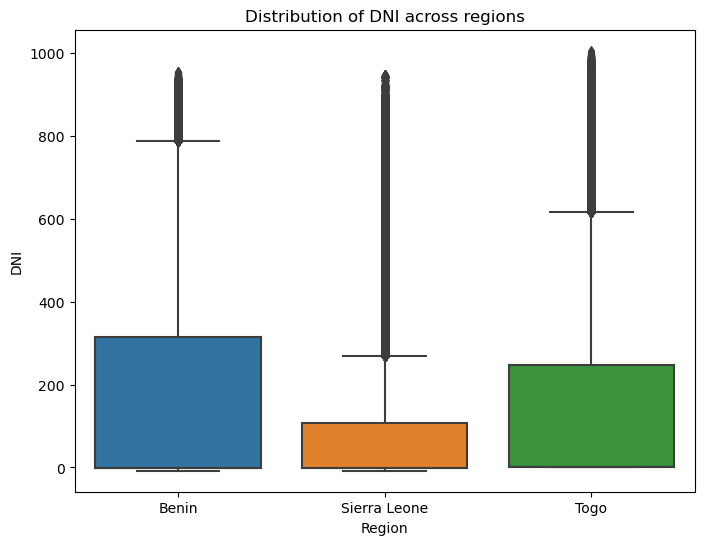

In [ ]:
# Create subplots for each region
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Benin
plot_histogram(benin_data, 'DNI', axes[0], 'Benin', 'DNI')

# Sierra Leone
plot_histogram(sierra_leone_data, 'DNI', axes[1], 'Sierra Leone', 'DNI')

# Togo
plot_histogram(togo_data, 'DNI', axes[2], 'Togo', 'DNI')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(x='Region', y='DNI', data=pd.concat([benin_data, sierra_leone_data, togo_data]))
axes.set_title('Distribution of DNI across regions')
axes.set_ylabel('DNI')
plt.show()

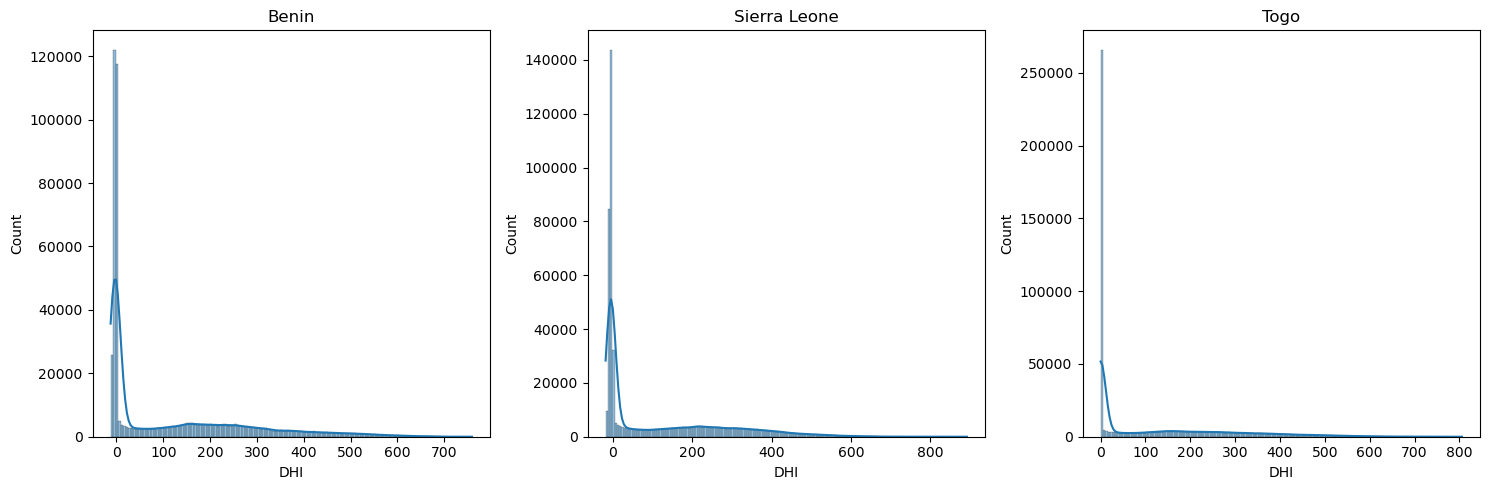

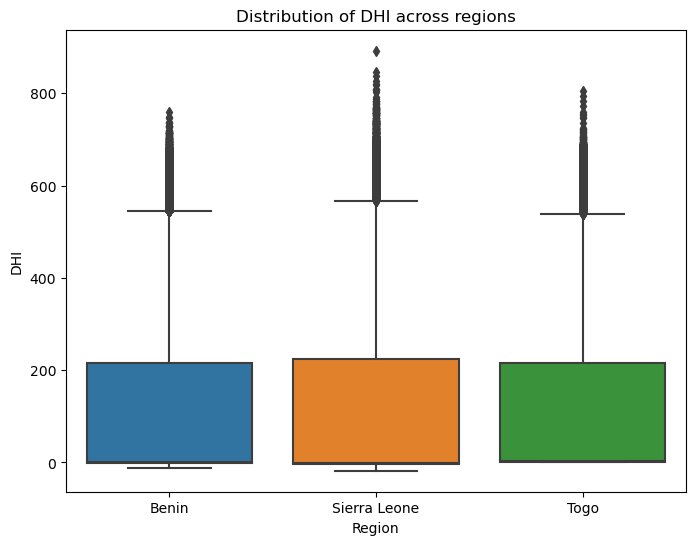

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Benin
plot_histogram(benin_data, 'DHI', axes[0], 'Benin', 'DHI')

# Sierra Leone
plot_histogram(sierra_leone_data, 'DHI', axes[1], 'Sierra Leone', 'DHI')

# Togo
plot_histogram(togo_data, 'DHI', axes[2], 'Togo', 'DHI')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(x='Region', y='DHI', data=pd.concat([benin_data, sierra_leone_data, togo_data]))
axes.set_title('Distribution of DHI across regions')
axes.set_ylabel('DHI')
plt.show()

## Summary Statistics

Summary statistics provide an overview of the dataset's numerical columns to better understand the data distribution. Key measures include:

- **Mean**: Represents the average value of each column.
- **Median**: Indicates the middle value when data is ordered, highlighting the central tendency.
- **Standard Deviation**: Reflects the variability or spread of the data values.
- **Minimum and Maximum**: Show the range of data values within each column.
- **25th, 50th, and 75th Percentiles**: Provide insights into data distribution and quartile splits.
- **Variance**: Indicates how far the data points deviate from the mean.

These statistics are essential for identifying trends, understanding variability, and detecting anomalies in the dataset.


In [ ]:
describe_data(benin_data, "Benin")
describe_data(sierra_leone_data, "Sierra Leone")
describe_data(togo_data, "Togo")


Descriptive Statistics for Benin:

count    525600.000000
mean        240.559452
std         331.131327
min         -12.900000
25%          -2.000000
50%           1.800000
75%         483.400000
max        1413.000000
Name: GHI, dtype: float64
--------------------
count    525600.000000
mean        167.187516
std         261.710501
min          -7.800000
25%          -0.500000
50%          -0.100000
75%         314.200000
max         952.300000
Name: DNI, dtype: float64
--------------------
count    525600.000000
mean        115.358961
std         158.691074
min         -12.600000
25%          -2.100000
50%           1.600000
75%         216.300000
max         759.200000
Name: DHI, dtype: float64
--------------------
count    525600.000000
mean        236.589496
std         326.894859
min           0.000000
25%           0.000000
50%           4.500000
75%         463.700000
max        1342.300000
Name: ModA, dtype: float64
--------------------
count    525600.000000
mean        228.

### Summary of Solar Energy Potential

1. **GHI (Global Horizontal Irradiance):** Measures total solar radiation received.  
   - **Meaning:** Higher GHI values indicate better solar energy potential.  
   - **Benin and Togo** have strong solar potential with averages above 230 W/m².  
   - **Sierra Leone** has a slightly lower average.

2. **DNI (Direct Normal Irradiance):** Measures sunlight intensity in a straight line.  
   - **Meaning:** High DNI favors concentrated solar technologies.  
   - **Benin and Togo** show moderate values.  
   - **Sierra Leone** has a comparatively low average.

3. **DHI (Diffuse Horizontal Irradiance):** Measures scattered sunlight.  
   - **Meaning:** High DHI can indicate cloudier conditions but contributes to overall solar potential.  
   - All countries have similar DHI ranges.

4. **Temperature (°C):** Affects solar panel efficiency.  
   - **Meaning:** Moderate temperatures are ideal for panel efficiency.  
   - Temperatures in all countries are suitable, with **Sierra Leone** being slightly cooler on average.

5. **Relative Humidity (RH %):** Indicates moisture in the air.  
   - **Meaning:** High RH can reduce solar panel efficiency.  
   - **Sierra Leone** has the highest RH (79.45%), which could impact solar performance slightly, compared to **Benin** and **Togo**.

6. **Wind Speed (m/s):** Helps in cooling panels, but excessive wind speed may pose risks.  
   - **Meaning:** Moderate wind speeds are beneficial for cooling without significant risks.  
   - All regions show moderate wind speeds.

### Conclusion:
- **Benin and Togo** show higher solar energy potential due to favorable GHI and moderate climate conditions.  
- **Sierra Leone** has slightly lower solar potential due to higher humidity and lower DNI.  
- These insights can help inform strategies for efficient solar farm installations in these regions.


In [15]:
analyze_data(benin_data, "Benin")


Analysis for Benin:

Missing values in GHI: 0
Number of outliers in GHI: 145
Number of negative values in GHI: 258847
Missing values in DNI: 0
Number of outliers in DNI: 15196
Number of negative values in DNI: 275987
Missing values in DHI: 0
Number of outliers in DHI: 8733
Number of negative values in DHI: 259182
Missing values in ModA: 0
Number of outliers in ModA: 98
Min ModA: 0.0, Max ModA: 1342.3
Missing values in ModB: 0
Number of outliers in ModB: 240
Min ModB: 0.0, Max ModB: 1342.3
Missing values in WS: 0
Number of outliers in WS: 6717
Min WS: 0.0, Max WS: 19.5
Missing values in WSgust: 0
Number of outliers in WSgust: 5368
Min WSgust: 0.0, Max WSgust: 26.6


In [18]:
analyze_data(benin_data, "sierra_leone")


Analysis for sierra_leone:

Missing values in GHI: 0
Number of outliers in GHI: 145
Number of negative values in GHI: 258847
Missing values in DNI: 0
Number of outliers in DNI: 15196
Number of negative values in DNI: 275987
Missing values in DHI: 0
Number of outliers in DHI: 8733
Number of negative values in DHI: 259182
Missing values in ModA: 0
Number of outliers in ModA: 98
Min ModA: 0.0, Max ModA: 1342.3
Missing values in ModB: 0
Number of outliers in ModB: 240
Min ModB: 0.0, Max ModB: 1342.3
Missing values in WS: 0
Number of outliers in WS: 6717
Min WS: 0.0, Max WS: 19.5
Missing values in WSgust: 0
Number of outliers in WSgust: 5368
Min WSgust: 0.0, Max WSgust: 26.6


In [19]:
analyze_data(benin_data, "togo_data")


Analysis for togo_data:

Missing values in GHI: 0
Number of outliers in GHI: 145
Number of negative values in GHI: 258847
Missing values in DNI: 0
Number of outliers in DNI: 15196
Number of negative values in DNI: 275987
Missing values in DHI: 0
Number of outliers in DHI: 8733
Number of negative values in DHI: 259182
Missing values in ModA: 0
Number of outliers in ModA: 98
Min ModA: 0.0, Max ModA: 1342.3
Missing values in ModB: 0
Number of outliers in ModB: 240
Min ModB: 0.0, Max ModB: 1342.3
Missing values in WS: 0
Number of outliers in WS: 6717
Min WS: 0.0, Max WS: 19.5
Missing values in WSgust: 0
Number of outliers in WSgust: 5368
Min WSgust: 0.0, Max WSgust: 26.6


### Dataset Overview

The analysis of the dataset reveals valuable insights into the quality and variability of the data. Notably, the dataset is complete, with no missing values across all variables. However, the presence of a significant number of outliers and negative values in key solar radiation components (GHI, DNI, DHI) highlights potential data quality issues that require further investigation. These anomalies could stem from sensor errors or data recording inconsistencies. Temperature measures (ModA and ModB) exhibit fewer outliers and a wide range, while wind metrics (WS and WSgust) show variability and include extreme wind events. To ensure accurate and meaningful insights, it is essential to address data quality issues by handling invalid values and evaluating the impact of outliers. This will pave the way for a robust analysis of weather patterns and their implications for solar energy generation in the Benin region.

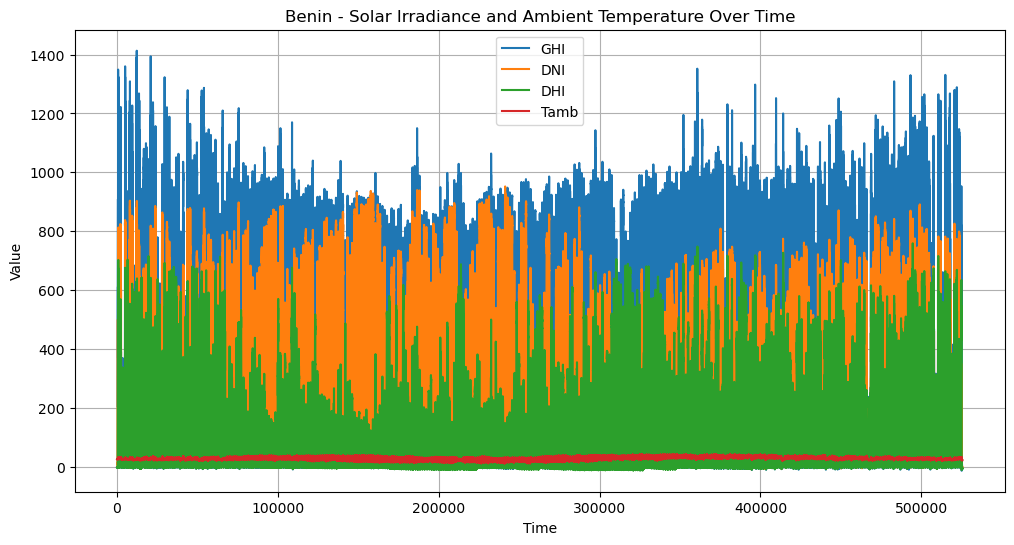

/home/helina/miniconda3/envs/gcp/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


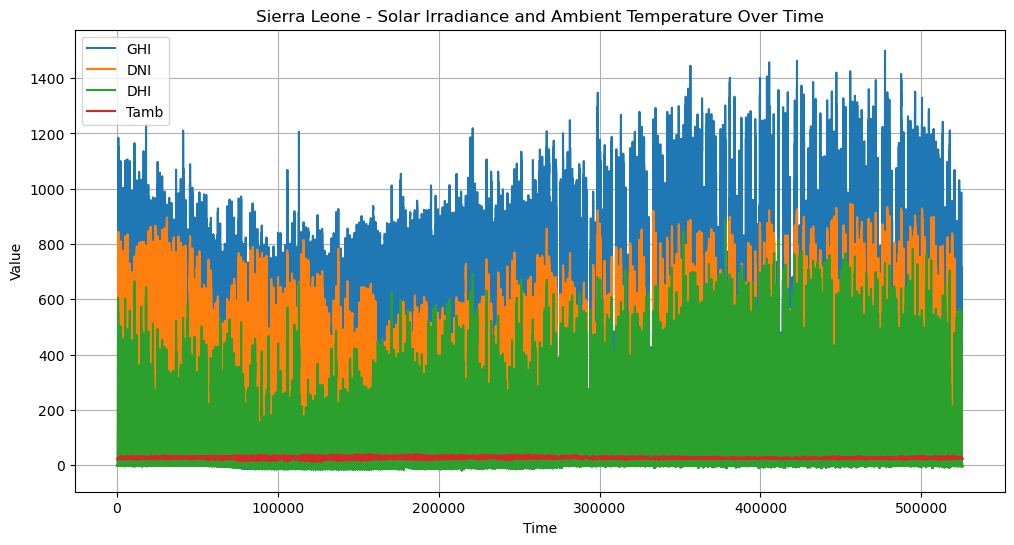

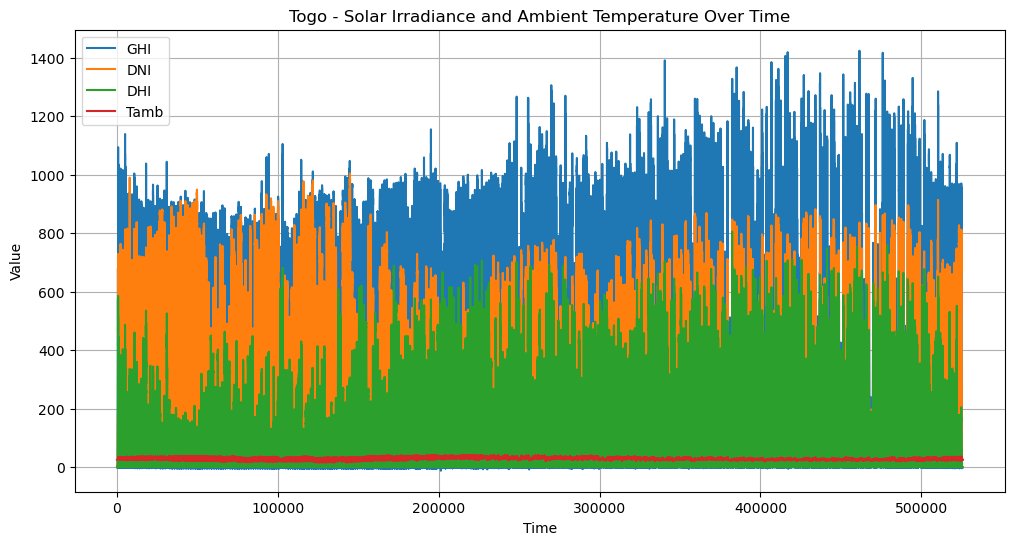

In [36]:
# Convert the 'time' column to datetime objects if it's not already
for df in [benin_data, sierra_leone_data, togo_data]:
    if 'Timestamp' in df.columns:
        try:
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])
            df = df.set_index('Timestamp')
        except ValueError:
            print("Error converting 'Timestamp' column to datetime. Check the format.")
    else:
        print("'time' column not found in the DataFrame")



plot_timeseries(benin_data, "Benin")
plot_timeseries(sierra_leone_data, "Sierra Leone")
plot_timeseries(togo_data, "Togo")

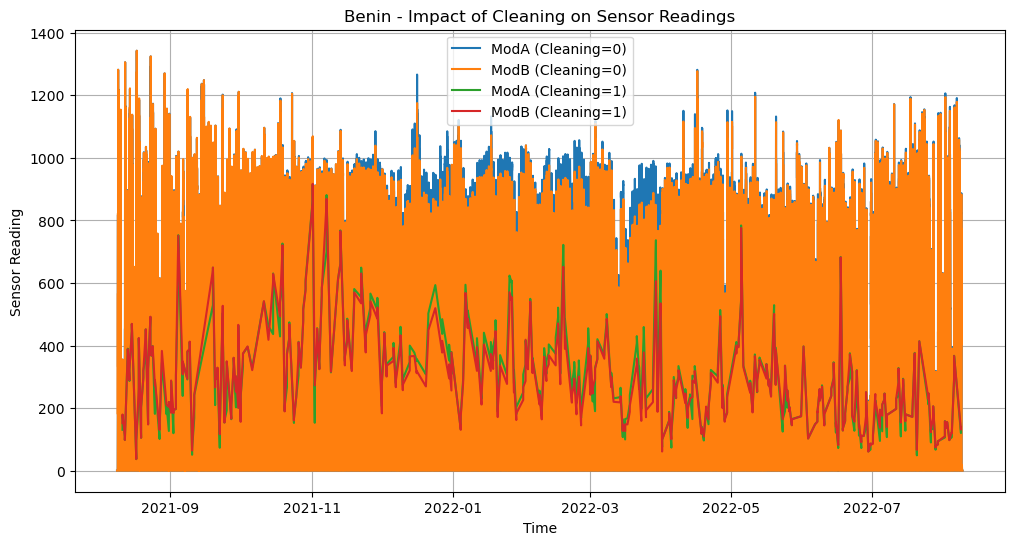

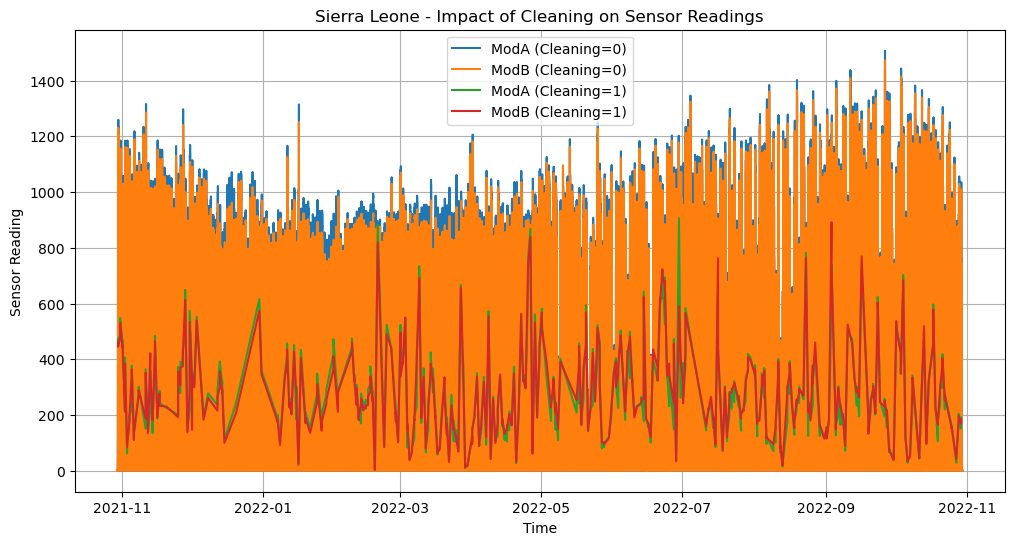

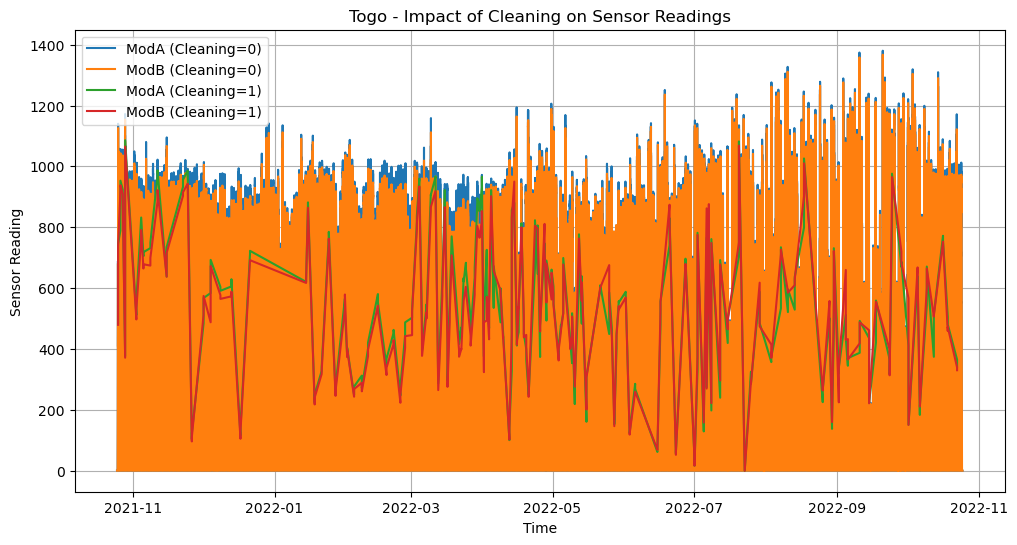

In [37]:
plot_cleaning_impact(benin_data, "Benin")
plot_cleaning_impact(sierra_leone_data, "Sierra Leone")
plot_cleaning_impact(togo_data, "Togo")

### Correlation Matrix Visualization

This function plots a **correlation matrix** for datasets, displaying the relationships between variables. It calculates the correlation between different columns and visualizes them using a **heatmap**.

- **Correlation Coefficients**:
  - Values range from **-1** (perfect negative correlation) to **1** (perfect positive correlation), with **0** indicating no correlation.
- **Heatmap**: Uses color gradients to represent correlation values, with annotations displaying the exact correlation coefficients.
  
The function is applied to datasets for **Benin**, **Sierra Leone**, and **Togo**, providing a quick visual overview of variable relationships in each region's data.



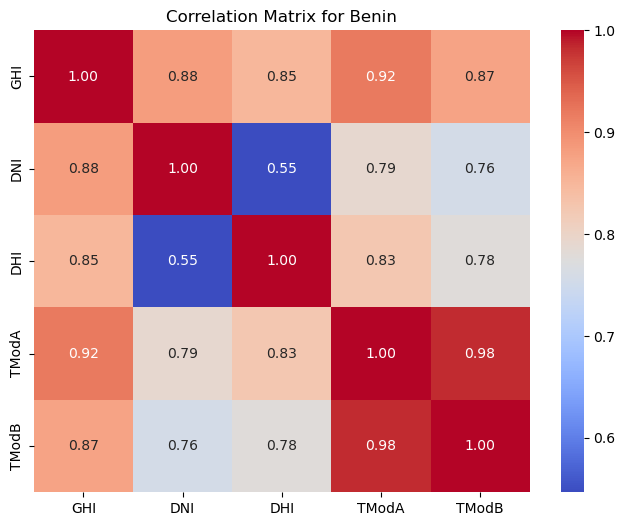

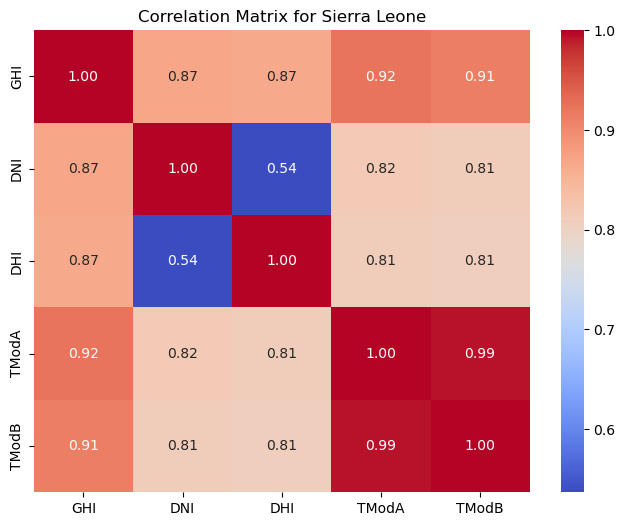

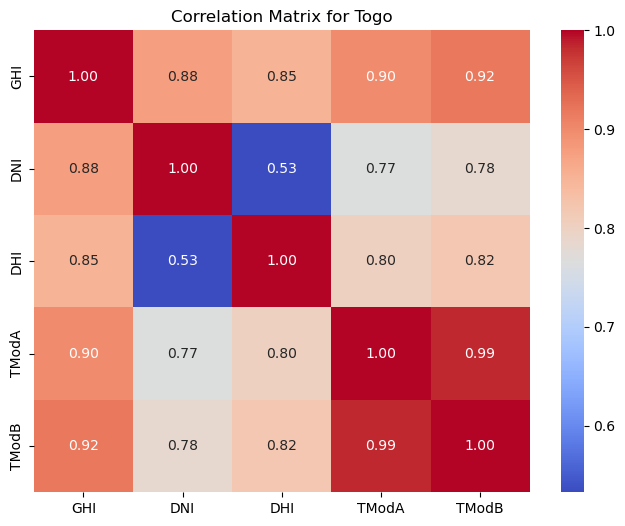

In [38]:
plot_correlation_matrix(benin_data, "Correlation Matrix for Benin")
plot_correlation_matrix(sierra_leone_data, "Correlation Matrix for Sierra Leone")
plot_correlation_matrix(togo_data, "Correlation Matrix for Togo")

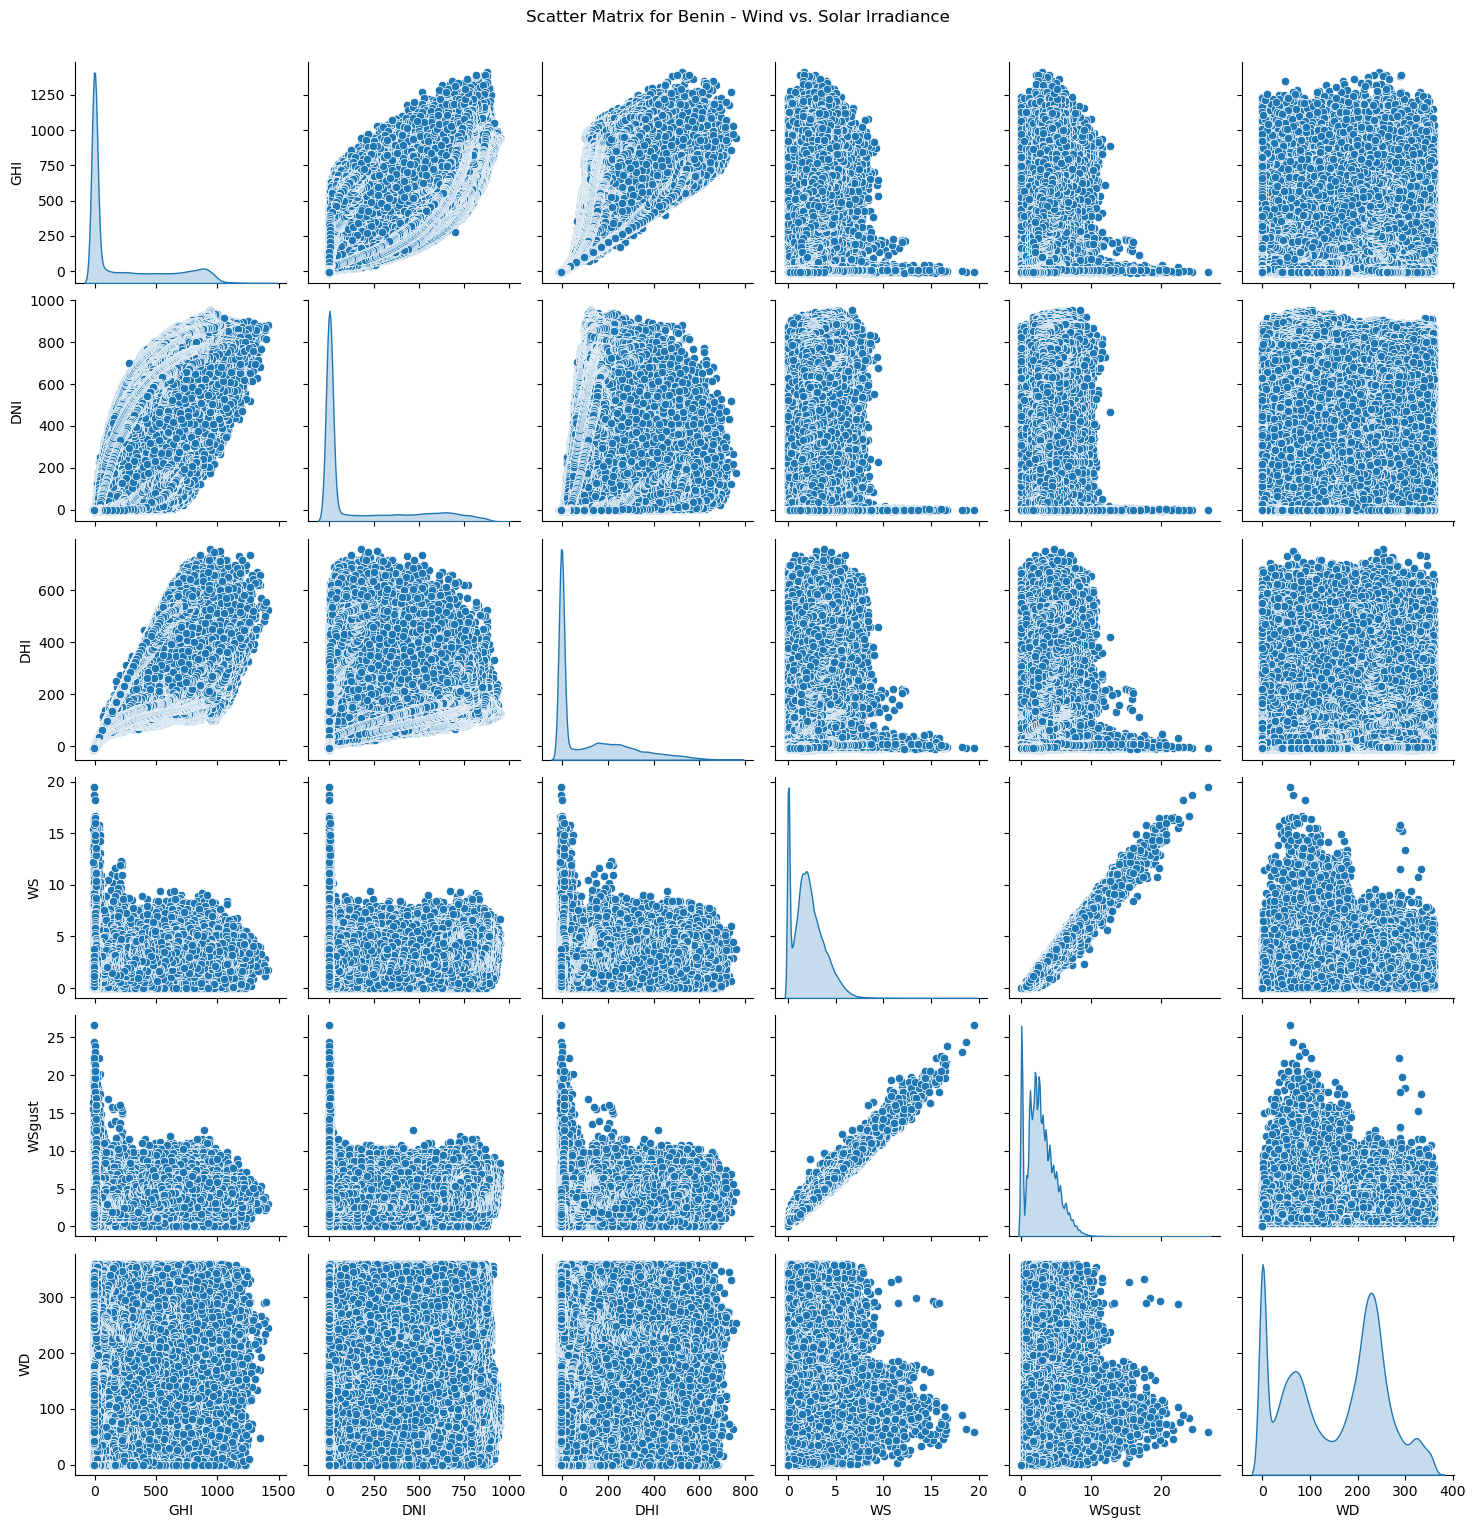

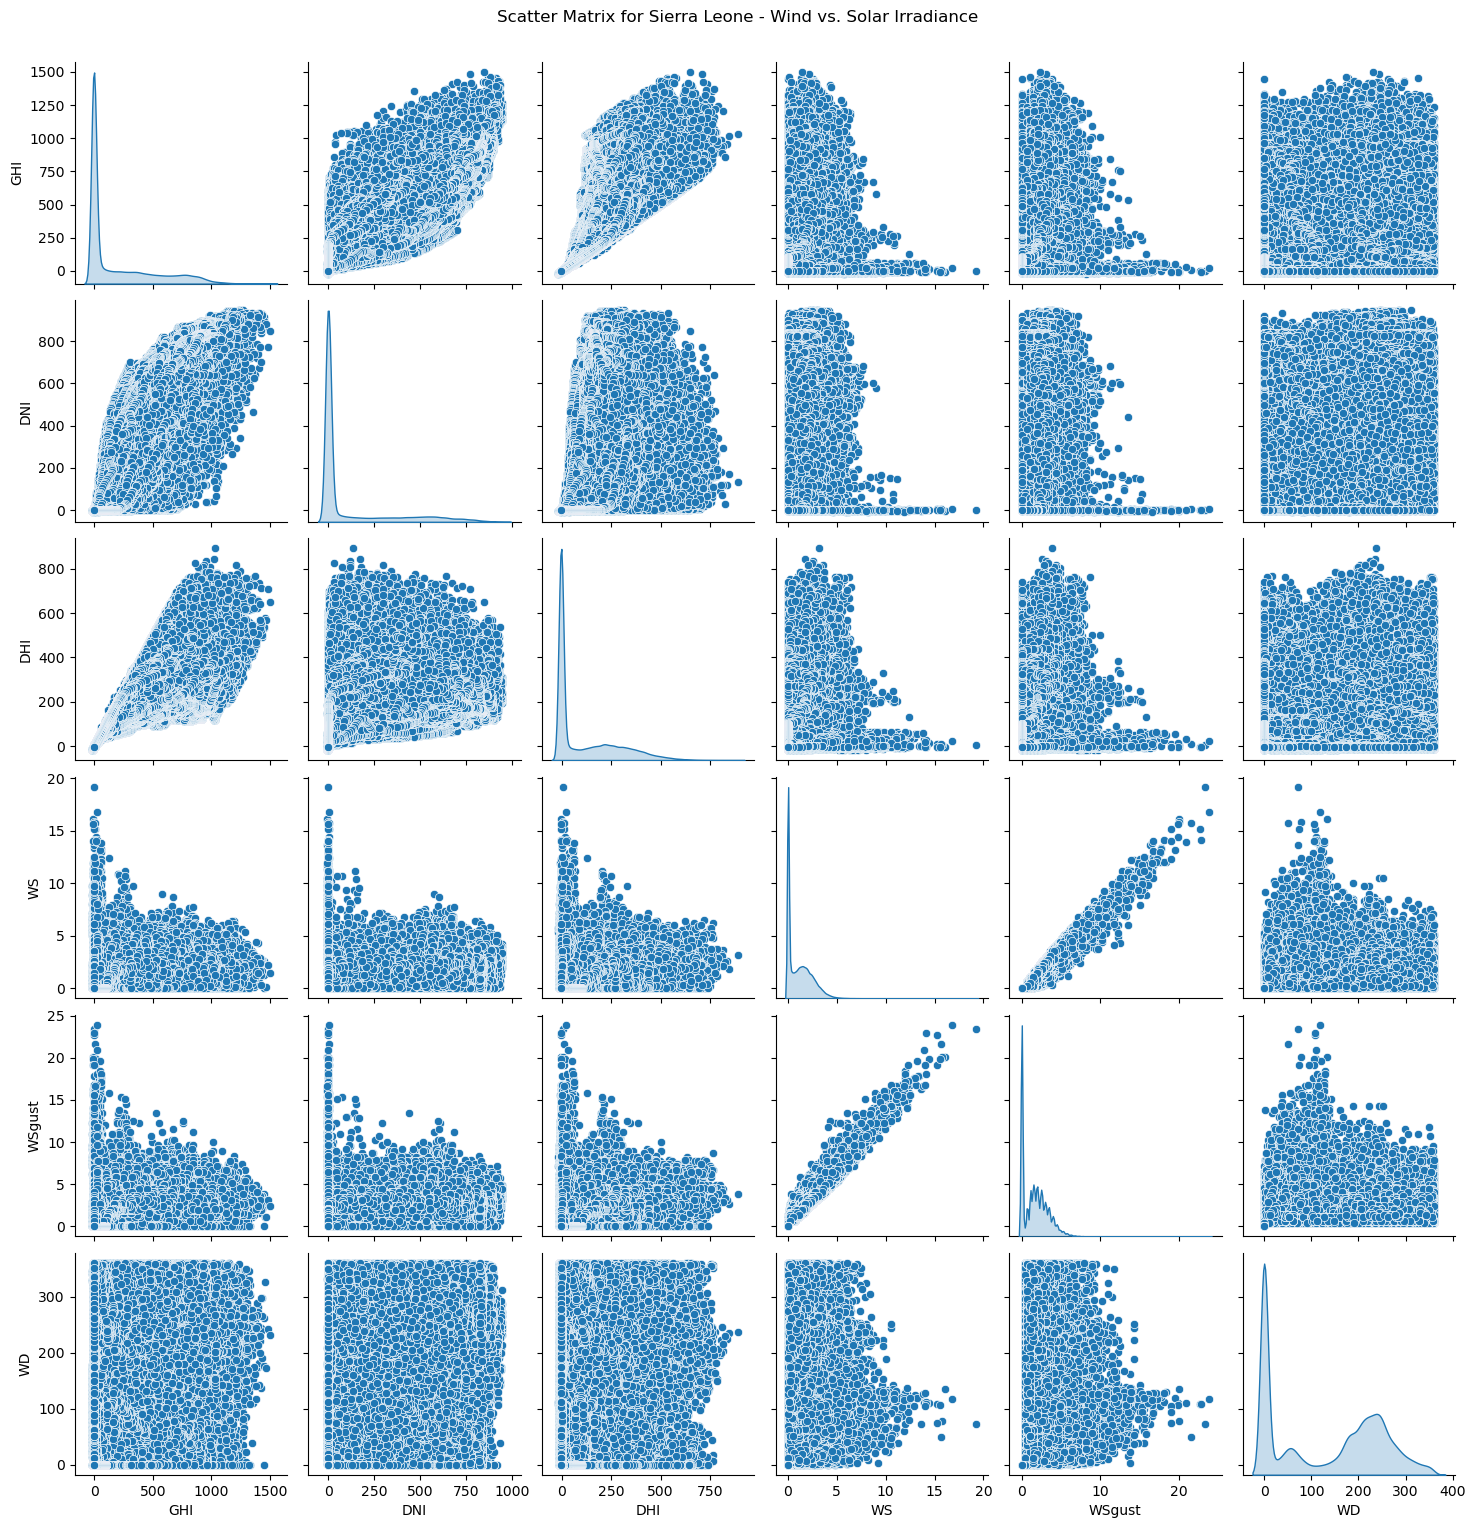

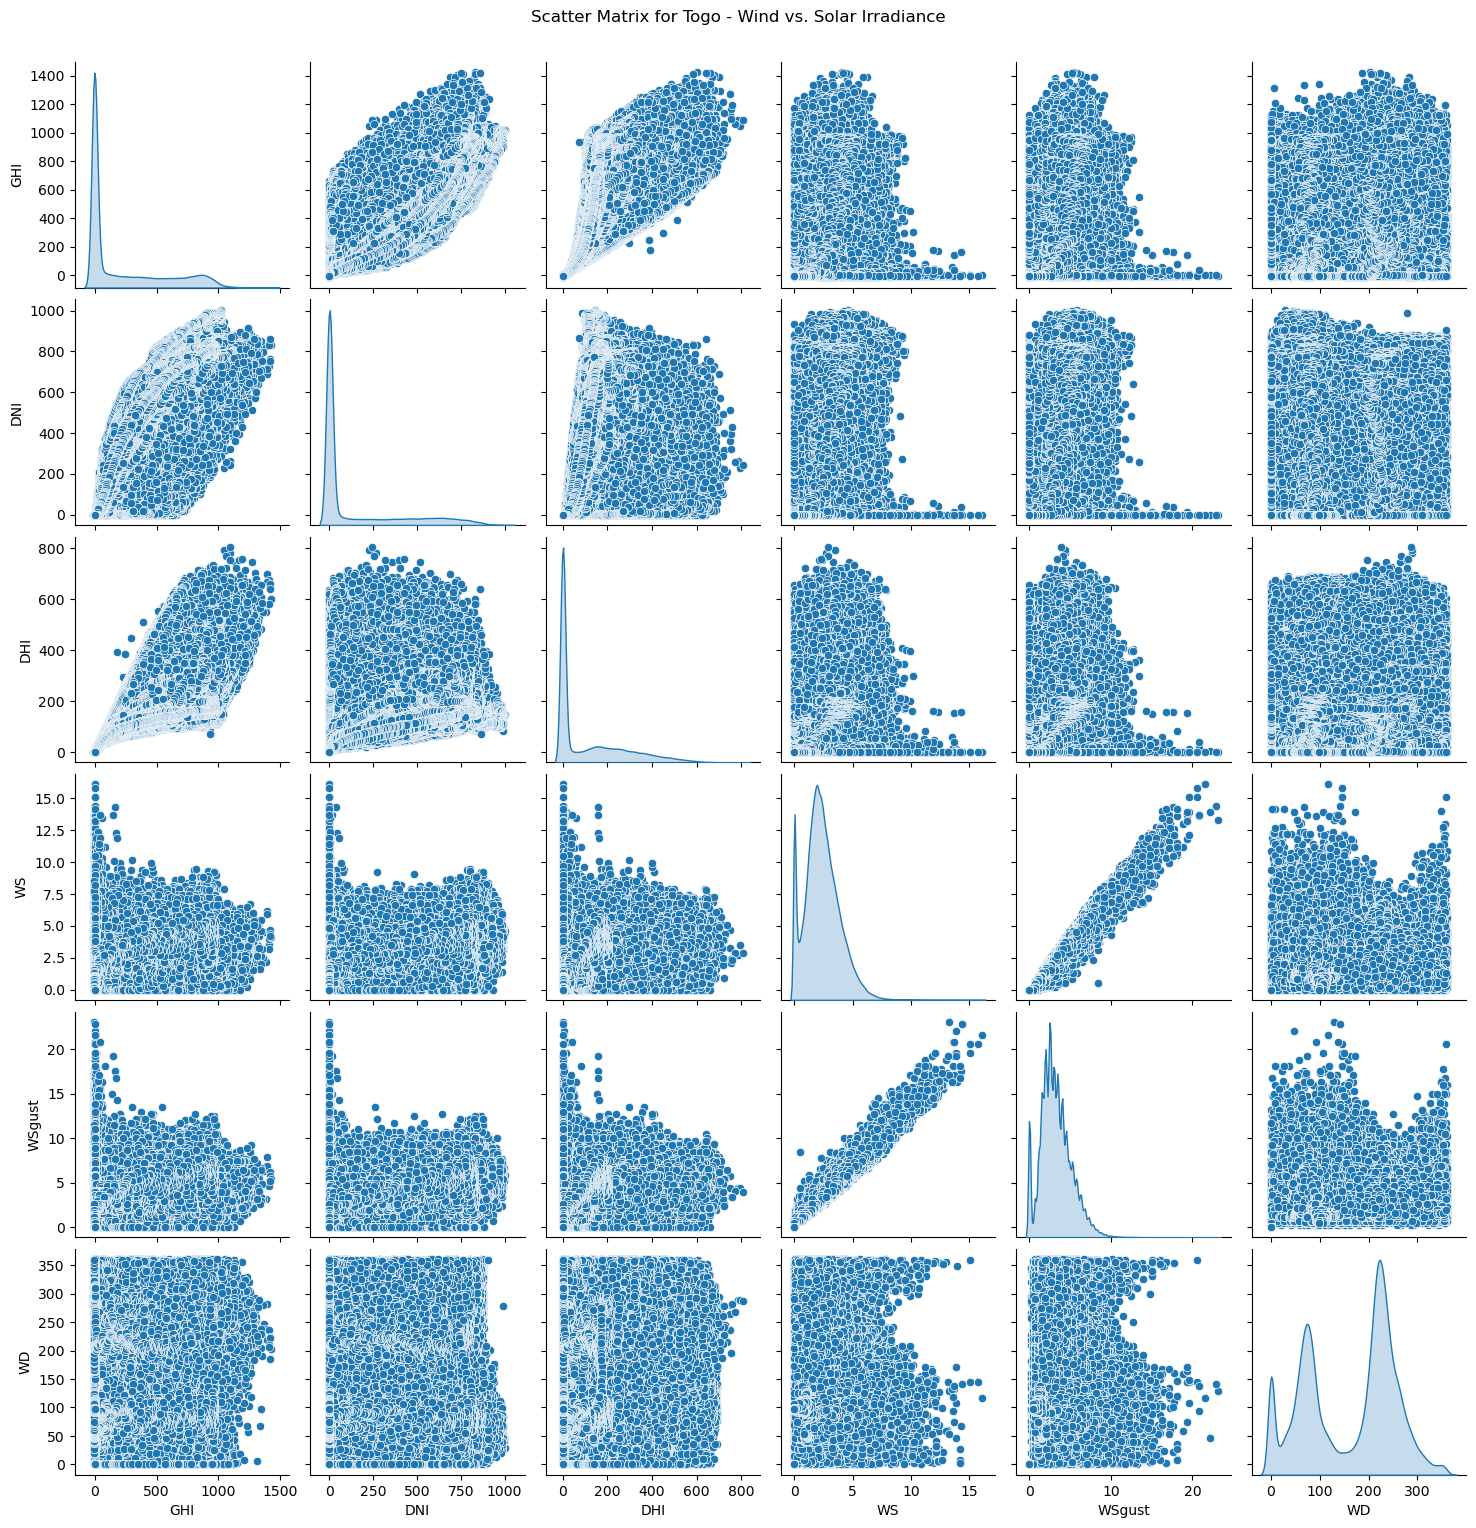

In [39]:
plot_wind_solar_relationship(benin_data, "Benin")
plot_wind_solar_relationship(sierra_leone_data, "Sierra Leone")
plot_wind_solar_relationship(togo_data, "Togo")

### Wind Rose Plot

The **wind rose plot** visualizes wind speed and direction data, showing how frequently the wind blows from specific directions at various speeds. It's a helpful tool for understanding the wind patterns in a given region.

- **Direction**: The plot is divided into **8 or 16 sectors** representing the cardinal directions (North, Northeast, East, etc.), displaying the frequency of wind coming from each direction.
- **Speed**: The plot uses **colored segments** to show wind speeds, with each color corresponding to a different speed range.
- **Frequency**: The **length of each sector** represents how often wind blows from a specific direction, with longer sectors indicating more frequent winds from that direction.

### Keys:
- Wind patterns can influence solar energy generation indirectly. For example, areas with high winds might have more dust or clouds, which could affect solar irradiance levels (GHI, DNI, DHI). Understanding the wind direction and speed can help assess potential disruptions in solar power generation.
- The wind rose can help in choosing optimal locations for solar panels. If wind speeds are too high, it could cause wear on solar panels over time, so this information can help to avoid areas with high wind stress.



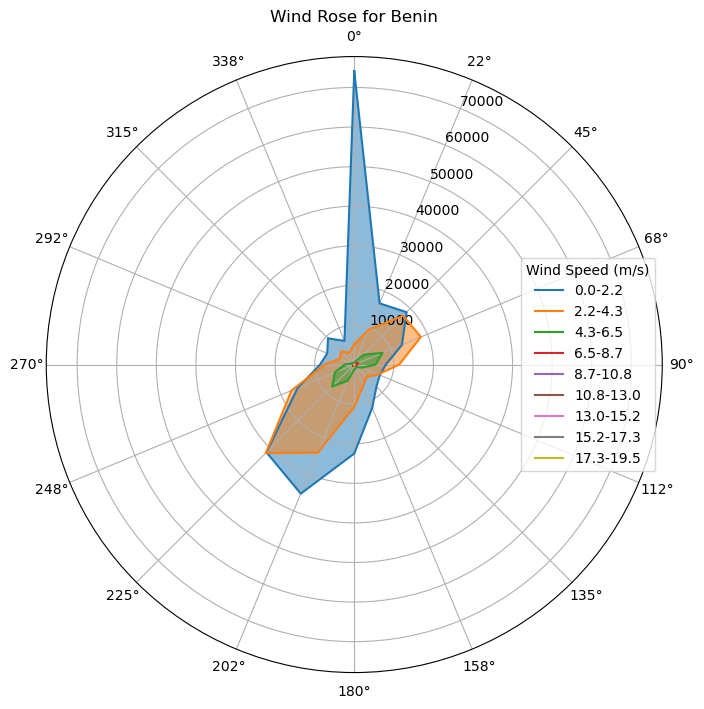

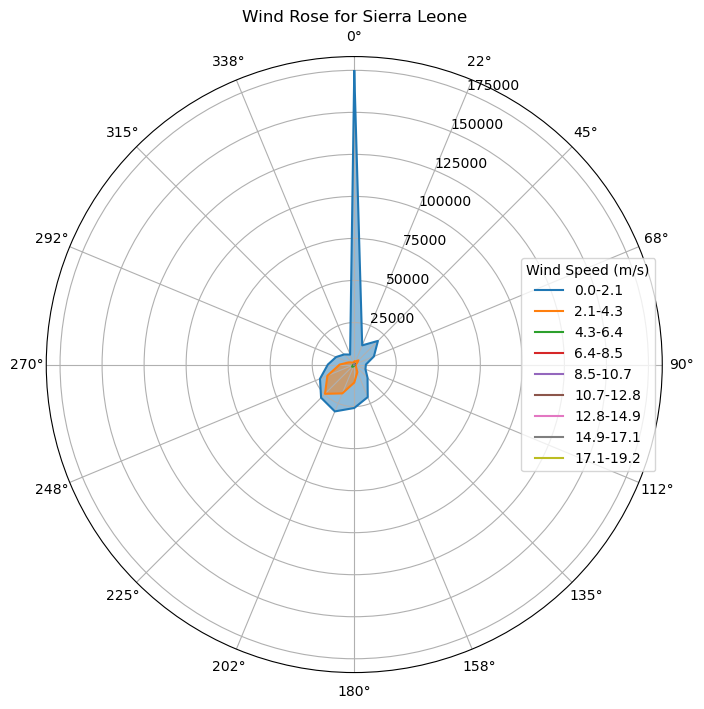

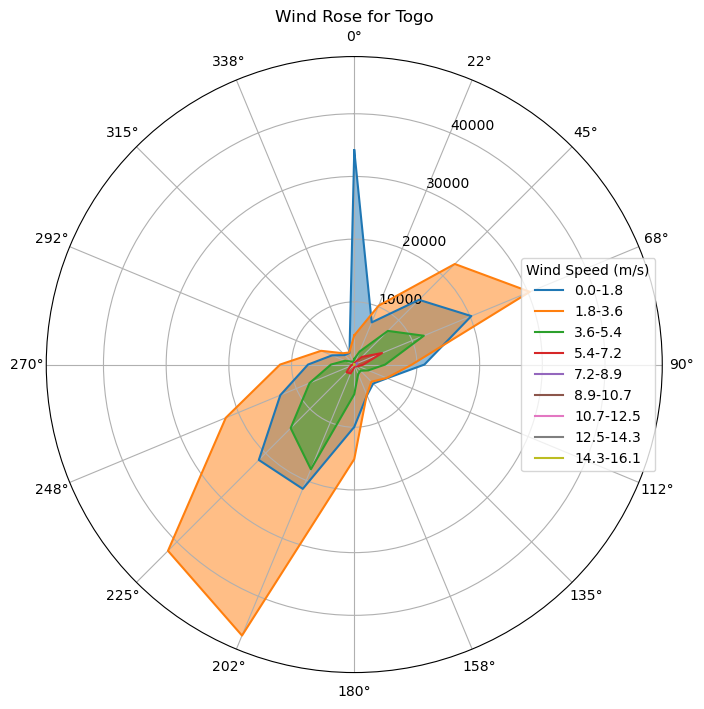

In [41]:
plot_wind_rose(benin_data, "Benin")
plot_wind_rose(sierra_leone_data, "Sierra Leone")
plot_wind_rose(togo_data, "Togo")

### Potential Analysis Insights:

1. **Relative Humidity and Solar Irradiance**:
   - **Increased RH**: Higher humidity levels can reduce the amount of sunlight reaching the solar panels due to water vapor scattering or absorbing solar radiation. This can lead to a decrease in solar irradiance (GHI, DNI).
   - **Decreased RH**: Lower humidity levels generally allow more sunlight to reach the surface, potentially increasing solar irradiance.

2. **Relative Humidity and Temperature (Tamb)**:
   - **High RH**: Can increase the perceived temperature because of reduced evaporative cooling, making it feel warmer even when the actual temperature is moderate. This can affect how efficiently the solar panels operate.
   - **Low RH**: Lower humidity levels can lead to higher evaporation, potentially cooling the surface, which may impact the performance of solar panels.

3. **Cloud Formation**:
   - **RH and Cloudiness**: Higher RH is associated with cloud formation, reducing the amount of direct sunlight. This impacts **DNI (Direct Normal Irradiance)**, as cloudy conditions often lead to significant reductions in solar power generation.

4. **Energy Efficiency**:
   - Humidity affects both the **efficiency of solar panels** and the **ambient temperature**. High RH can lead to condensation on panels, reducing efficiency over time if not maintained properly.

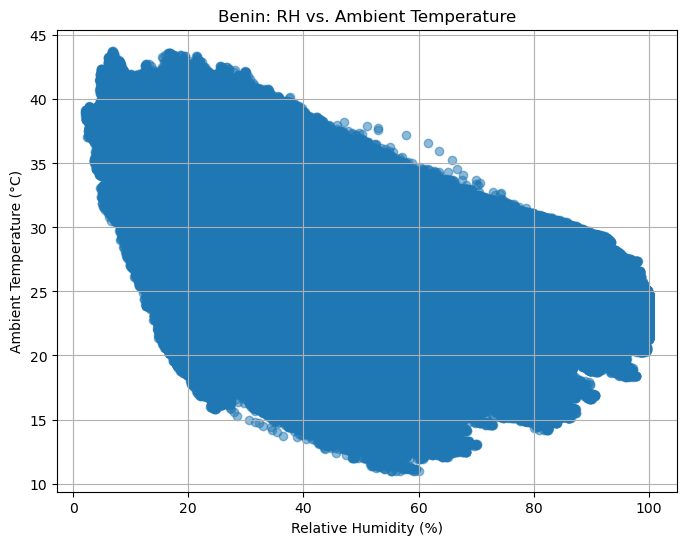

Benin: Correlation between RH and Tamb: -0.41
Benin: Correlation between RH and GHI: -0.36
Benin: Correlation between RH and DNI: -0.37
Benin: Correlation between RH and DHI: -0.29


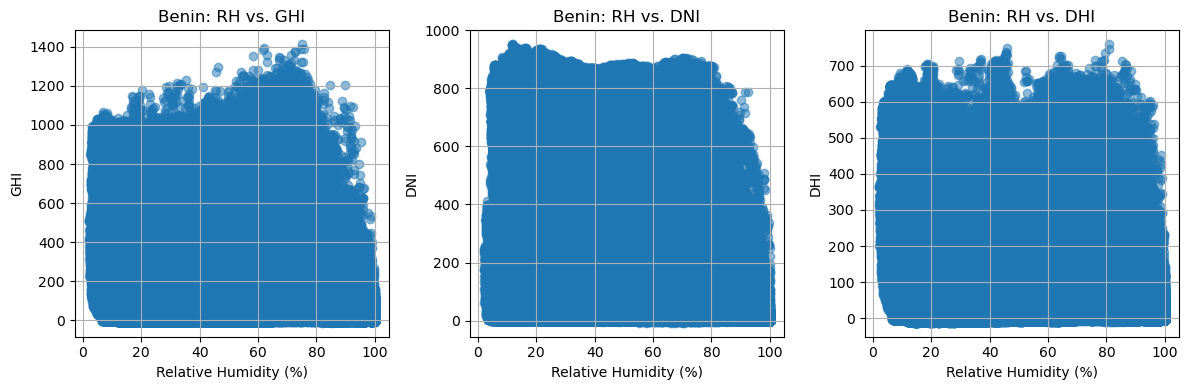

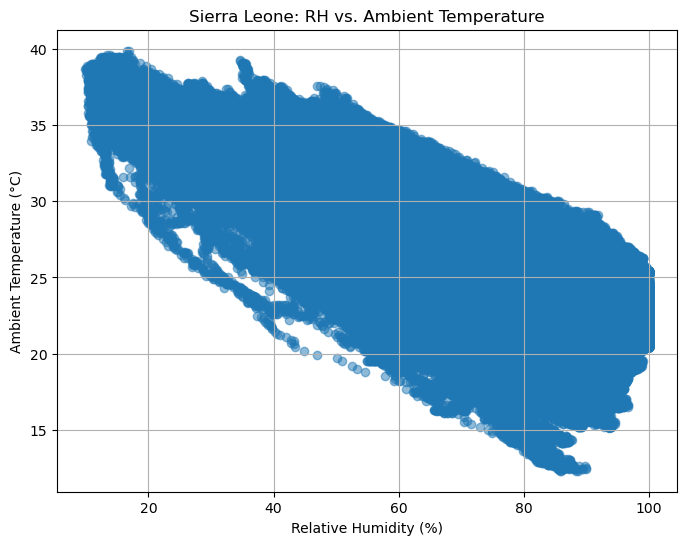

Sierra Leone: Correlation between RH and Tamb: -0.79
Sierra Leone: Correlation between RH and GHI: -0.55
Sierra Leone: Correlation between RH and DNI: -0.55
Sierra Leone: Correlation between RH and DHI: -0.43


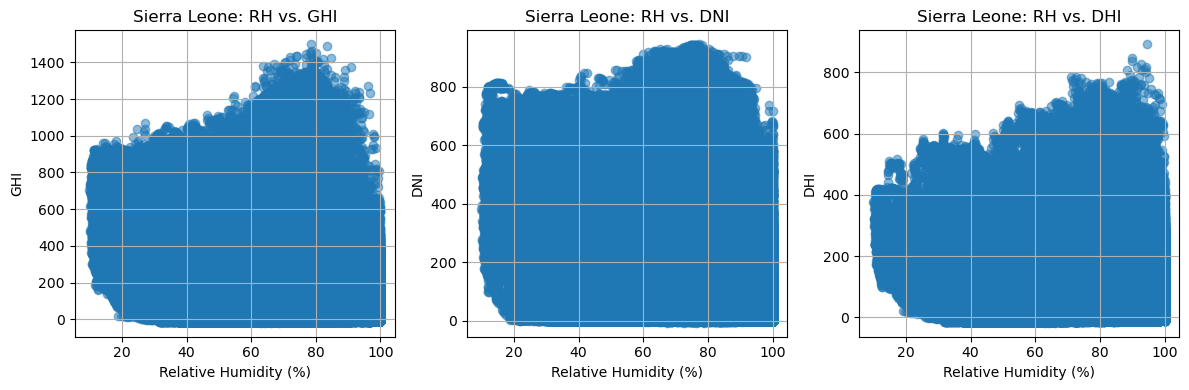

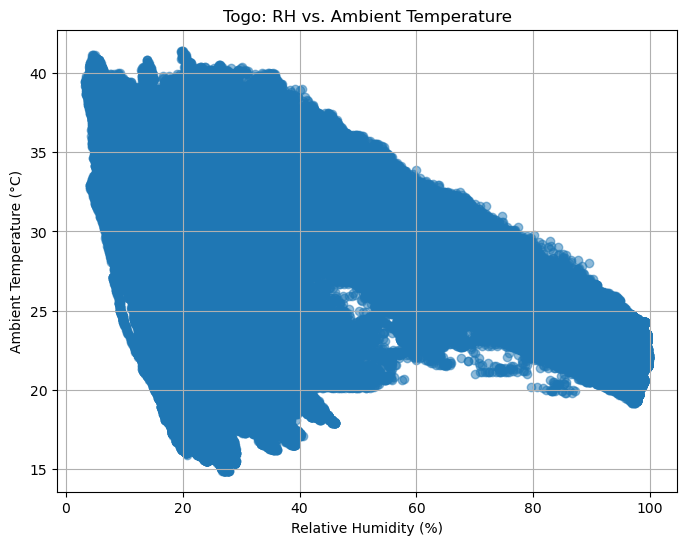

Togo: Correlation between RH and Tamb: -0.40
Togo: Correlation between RH and GHI: -0.26
Togo: Correlation between RH and DNI: -0.33
Togo: Correlation between RH and DHI: -0.16


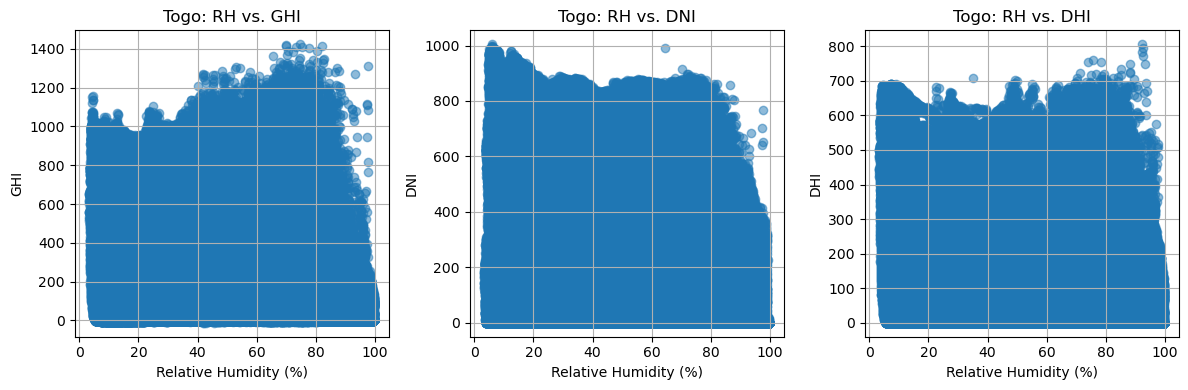

In [42]:
analyze_rh_impact(benin_data, "Benin")
analyze_rh_impact(sierra_leone_data, "Sierra Leone")
analyze_rh_impact(togo_data, "Togo")

## Analysis of Relative Humidity (RH) and Other Variables

### **Togo:**
- **RH and Tamb**: The correlation is **-0.40**, suggesting a weak negative relationship between RH and ambient temperature. As RH increases, Tamb slightly decreases, which could indicate some cooling effect from higher moisture content in the air.
- **RH and GHI**: The correlation is **-0.26**, showing a weak negative relationship between RH and global horizontal irradiance (GHI). Higher humidity slightly reduces the solar radiation reaching the surface.
- **RH and DNI**: The correlation is **-0.33**, indicating a moderate negative relationship between RH and direct normal irradiance (DNI). High humidity tends to reduce direct sunlight.
- **RH and DHI**: The correlation is **-0.16**, showing a very weak negative relationship. It suggests that RH has a minimal impact on diffuse horizontal irradiance.

### **Sierra Leone:**
- **RH and Tamb**: The correlation is **-0.79**, indicating a strong negative relationship between RH and ambient temperature. As RH increases, Tamb decreases significantly, potentially due to more cloud cover or higher moisture in the air.
- **RH and GHI**: The correlation is **-0.55**, showing a moderate negative relationship between RH and GHI. Increased humidity reduces the amount of sunlight reaching the surface.
- **RH and DNI**: The correlation is **-0.55**, suggesting a moderate negative relationship. High humidity reduces direct solar radiation, similar to its effect on GHI.
- **RH and DHI**: The correlation is **-0.43**, indicating a moderate negative relationship. Increased RH slightly reduces diffuse irradiance.

### **Benin:**
- **RH and Tamb**: The correlation is **-0.41**, suggesting a weak negative relationship between RH and ambient temperature. Higher humidity slightly reduces the temperature.
- **RH and GHI**: The correlation is **-0.36**, indicating a weak negative relationship. As RH increases, GHI decreases slightly.
- **RH and DNI**: The correlation is **-0.37**, suggesting a weak to moderate negative relationship. Increased RH reduces direct sunlight, although the effect is not very strong.
- **RH and DHI**: The correlation is **-0.29**, showing a weak negative relationship. Increased RH has a slight impact on diffuse irradiance.

### **Summary of Findings:**
- **General Trends**:
  - **Negative Correlation**: In all three regions (Togo, Sierra Leone, Benin), there is a **negative correlation** between **RH** and **solar irradiance** (GHI, DNI, DHI). As RH increases, solar radiation tends to decrease, likely due to cloud formation and scattering of sunlight by water vapor.
  - **Ambient Temperature**: There is also a **negative correlation** between RH and **Tamb** (ambient temperature) in all regions, but the strength of the correlation varies. Sierra Leone shows the strongest negative correlation, suggesting that higher humidity may lead to cooler temperatures, possibly due to cloud cover or increased moisture in the air.

### **Impact on Solar Energy Production:**
- **Humidity and Solar Irradiance**: Higher RH tends to reduce the amount of solar energy available, especially direct radiation (DNI), which is crucial for solar panel efficiency. This may affect the **energy production potential** in these regions, with **Sierra Leone** being more impacted than **Benin** and **Togo**.
- **Temperature and Efficiency**: The correlation between RH and temperature suggests that in areas with high RH (like Sierra Leone), temperatures may drop, which could potentially improve solar panel efficiency, as cooler panels generally perform better.

### **Implications**:
- **Regional Variations**: **Sierra Leone** appears to be more affected by RH, with higher humidity leading to a notable decrease in solar radiation. This could suggest the need for **panel adjustments** or **location optimization** in these regions to account for weather patterns.
- **Energy Forecasting**: The correlations provide useful insights into how **weather patterns** (specifically humidity) might influence **solar energy production** and can help in developing more **accurate energy forecasts** for these regions.


In [ ]:
# Calculate Z-scores for each column
z_scores = benin_data.apply(zscore)

# Define a threshold for flagging outliers
threshold = 3

# Flag data points with Z-scores above the threshold
outliers = (np.abs(z_scores) > threshold)

In [ ]:
# Calculate Z-scores for each column
z_scores = sierra_leone_data.apply(zscore)

# Define a threshold for flagging outliers
threshold = 3

# Flag data points with Z-scores above the threshold
outliers = (np.abs(z_scores) > threshold)

In [ ]:
# Calculate Z-scores for each column
z_scores = togo_data.apply(zscore)

# Define a threshold for flagging outliers
threshold = 3

# Flag data points with Z-scores above the threshold
outliers = (np.abs(z_scores) > threshold)

### Bubble charts
To explore complex relationships between variables, such as GHI vs. Tamb vs. WS, with bubble size representing an additional variable like RH or BP (Barometric Pressure)

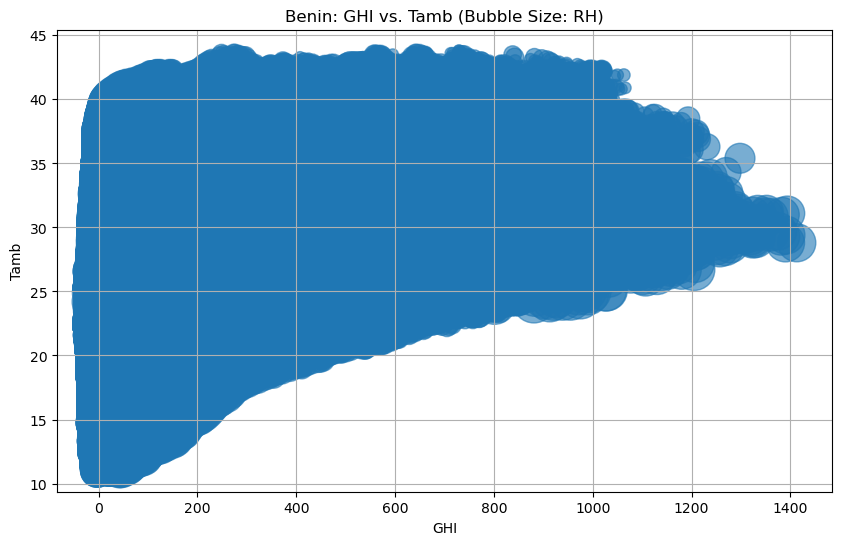

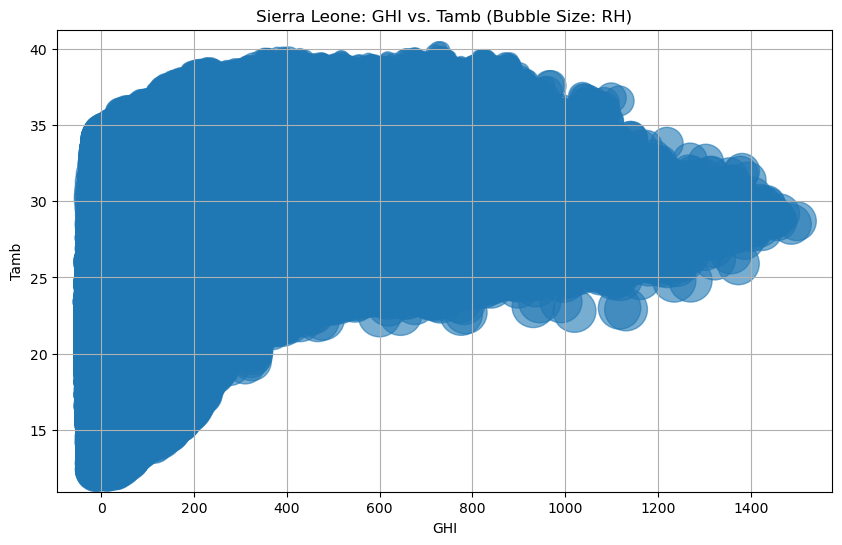

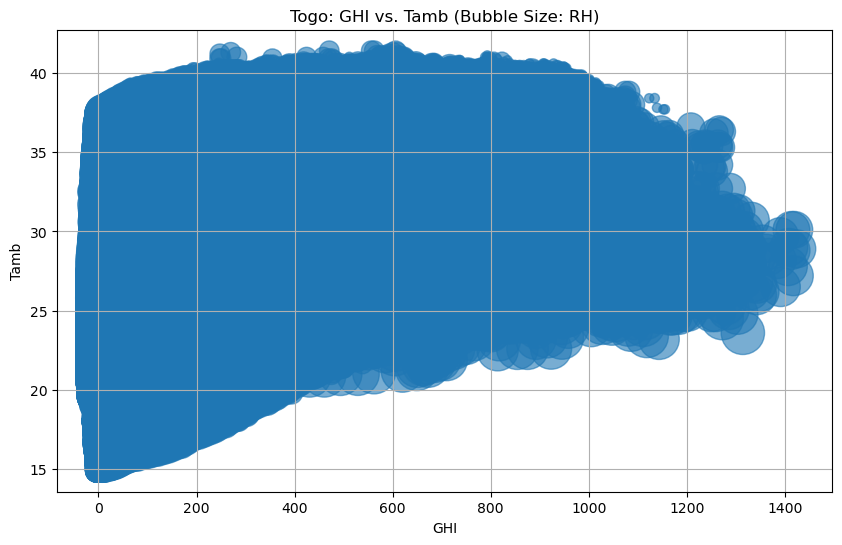

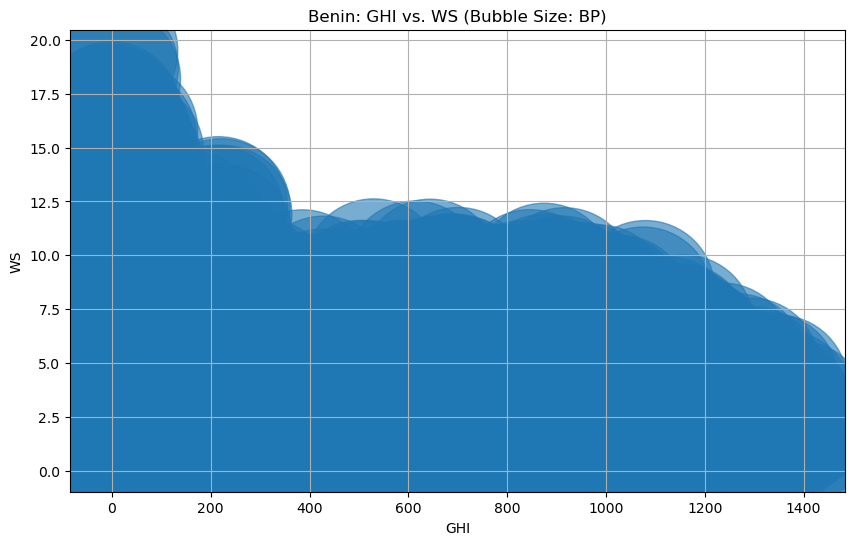

KeyboardInterrupt: 

In [3]:
plot_bubble_chart(benin_data, 'GHI', 'Tamb', 'RH', "Benin")
plot_bubble_chart(sierra_leone_data, 'GHI', 'Tamb', 'RH', "Sierra Leone")
plot_bubble_chart(togo_data, 'GHI', 'Tamb', 'RH', "Togo")

plot_bubble_chart(benin_data, 'GHI', 'WS', 'BP', "Benin")
plot_bubble_chart(sierra_leone_data, 'GHI', 'WS', 'BP', "Sierra Leone")
plot_bubble_chart(togo_data, 'GHI', 'WS', 'BP', "Togo")

## Data Cleaning
Clean the dataset by handling missing values, anomalies, and irrelevant columns to ensure high-quality data for analysis.

### **Steps**:

1. **Drop Columns with Null Values**:
   - Remove the **'Comments'** column, which is entirely null, as it provides no useful information.

2. **Handle Missing Values**:
   - Fill missing values in numerical columns with the mean of the respective columns.
   - Drop rows with any remaining missing values.

3. **Handle Anomalies**:
   - Remove rows with outliers identified by Z-scores greater than 3 or less than -3.
   - Ensure columns like **GHI**, **DNI**, **DHI**, and **Tamb** contain only non-negative values.

4. **Normalize or Transform Data**:
   - Optional: Normalize numerical data if necessary for modeling or analysis.
